<a href="https://colab.research.google.com/github/PCeltide/Coursera/blob/main/Financial%20Analysis%20with%20ARIMA%20and%20Time%20Series/FirstARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U statsmodels

In [ ]:
!wget -nc https://lazyprogrammer.me/course_files/airline_passengers.csv

--2025-04-02 18:48:35--  https://lazyprogrammer.me/course_files/airline_passengers.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 403 Forbidden
2025-04-02 18:48:36 ERROR 403: Forbidden.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('airline_passengers.csv', index_col = 'Month', parse_dates=True)

In [ ]:
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


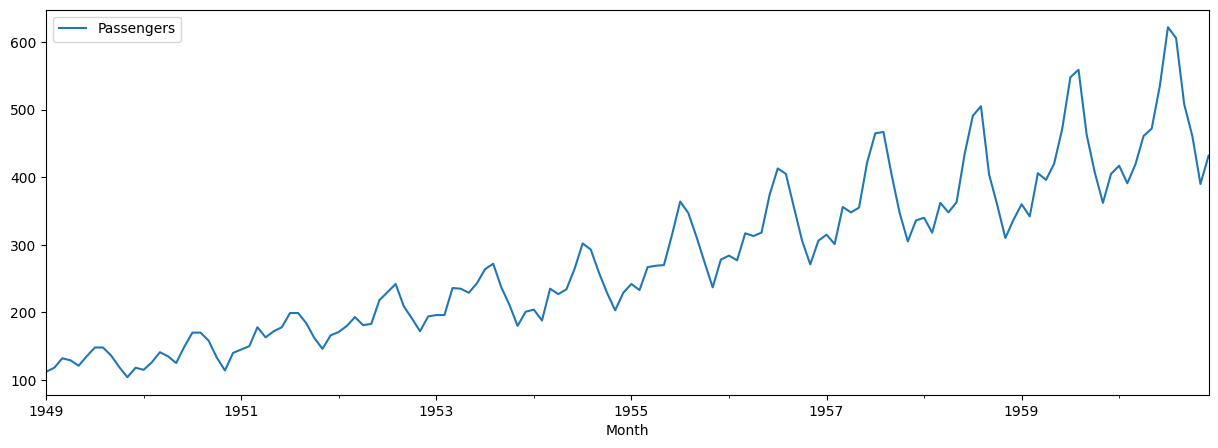

In [ ]:
df.plot(figsize=(15, 5));

In [ ]:
df['1stdiff'] = df['Passengers'].diff()
# This is a Pandas series method that calculates the difference between each element (row value) in the 'Passengers' column and the element in the previous row of that same column.

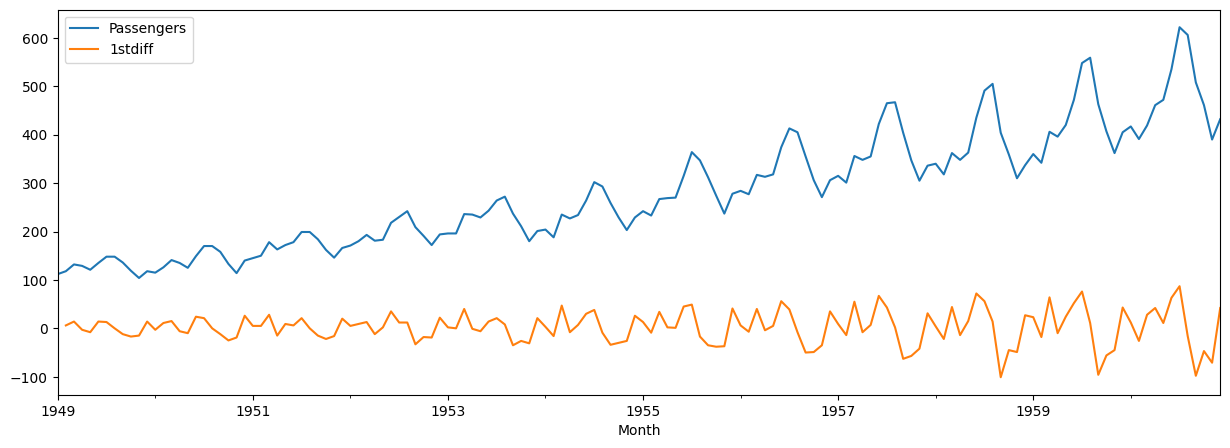

In [ ]:
df.plot(figsize=(15, 5));

In [ ]:
df['LogPassengers'] = np.log(df['Passengers'])

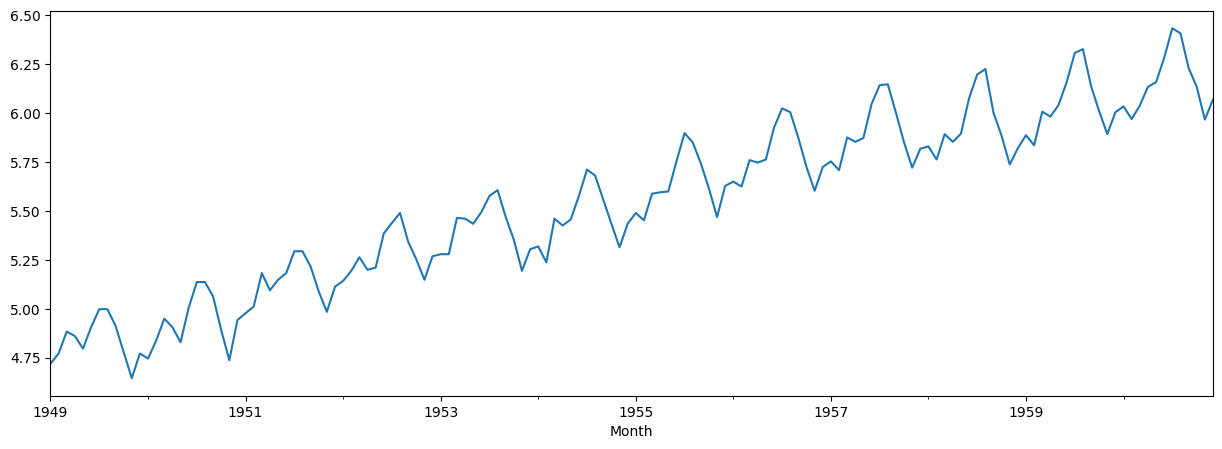

In [ ]:
df['LogPassengers'].plot(figsize=(15, 5));

In [ ]:
from statsmodels.tsa.arima.model import ARIMA # Import ARIMA class from statsmodel

In [ ]:
df.index.freq = 'MS' #months

Ntest = 12
train = df.iloc[:-Ntest]
test = df.iloc[-Ntest:]

In [ ]:
train_idx = df.index <= train.index[-1] # Necessary for when we want to store our predictions in our dataframe
test_idx = df.index > train.index[-1]

In [ ]:
arima = ARIMA(train['Passengers'],order=(1,0,0)) # Test AR(1) model; this when the model depends linearly on the previous entry

In [ ]:
arima_result = arima.fit() # An ARIMA result object, The fit() method performs the statistical estimation process.

In [ ]:
df.loc[train_idx, 'AR(1)'] = arima_result.predict(
    start=train.index[0], end=train.index[-1]
)
print(df)

            Passengers  1stdiff  LogPassengers       AR(1)
Month                                                     
1949-01-01         112      NaN       4.718499  262.490027
1949-02-01         118      6.0       4.770685  117.750054
1949-03-01         132     14.0       4.882802  123.520801
1949-04-01         129     -3.0       4.859812  136.985877
1949-05-01         121     -8.0       4.795791  134.100503
...                ...      ...            ...         ...
1960-08-01         606    -16.0       6.406880         NaN
1960-09-01         508    -98.0       6.230481         NaN
1960-10-01         461    -47.0       6.133398         NaN
1960-11-01         390    -71.0       5.966147         NaN
1960-12-01         432     42.0       6.068426         NaN

[144 rows x 4 columns]


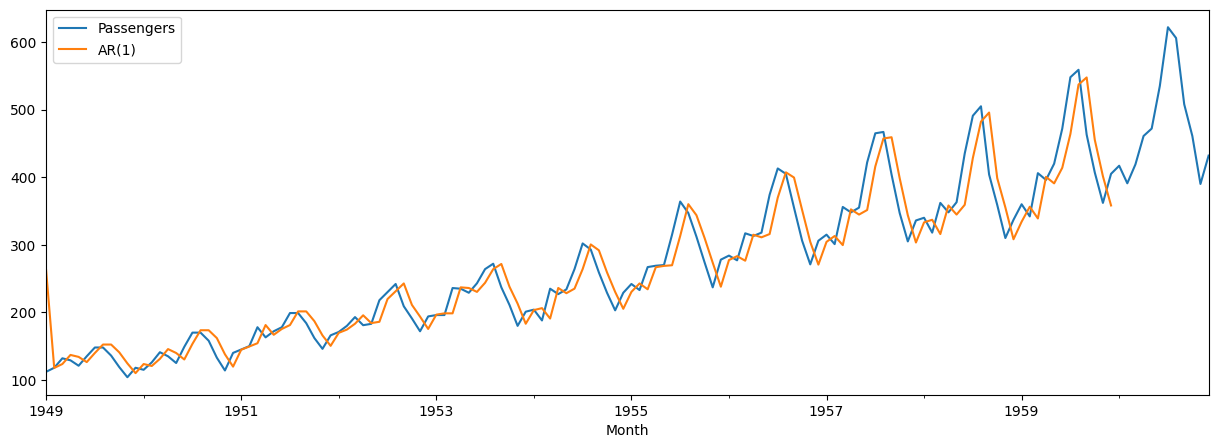

In [ ]:
df[['Passengers', 'AR(1)']].plot(figsize=(15, 5));

In [ ]:
prediction_result = arima_result.get_forecast(Ntest)
forecast = prediction_result.predicted_mean
df.loc[test_idx, 'AR(1)'] = forecast

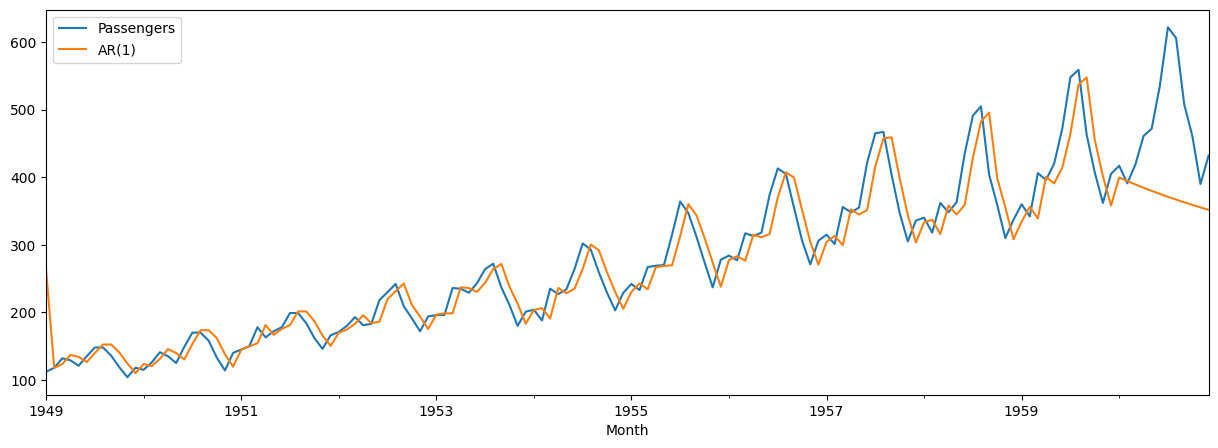

In [ ]:
df[['Passengers', 'AR(1)']].plot(figsize=(15, 5));

In [ ]:
# Explore prediction result further
type(prediction_result)
# This is a Prediction Results Wrapper

statsmodels.tsa.statespace.mlemodel.PredictionResultsWrapper

In [ ]:
# Confidence interval
prediction_result.conf_int()

,lower Passengers,upper Passengers
1960-01-01,338.658210,460.451500
1960-02-01,309.826171,478.809354
1960-03-01,287.732168,490.829379
1960-04-01,269.338256,499.534230
1960-05-01,253.432284,506.121347
1960-06-01,239.373402,511.217437
1960-07-01,226.768868,515.201638
1960-08-01,215.354570,518.324977
1960-09-01,204.941150,520.764224
1960-10-01,195.386337,522.649550


In [ ]:
def plot_fit_and_forecast(result):
  ''' Takes in a ARIMA result object '''
  fig, ax = plt.subplots(figsize=(15, 5))
  ax.plot(df['Passengers'], label='data')

  # plot the curve fitted on train set
  train_pred = result.fittedvalues
  ax.plot(train.index, train_pred, color='green', label='fitted')

  # forecast the test set
  prediction_result = result.get_forecast(Ntest)
  conf_int = prediction_result.conf_int()
  lower, upper = conf_int['lower Passengers'], conf_int['upper Passengers']
  forecast = prediction_result.predicted_mean
  ax.plot(test.index, forecast, label='forecast')
  ax.fill_between(test.index, \
                  lower, upper, \
                  color='red', alpha=0.3)
  ax.legend()

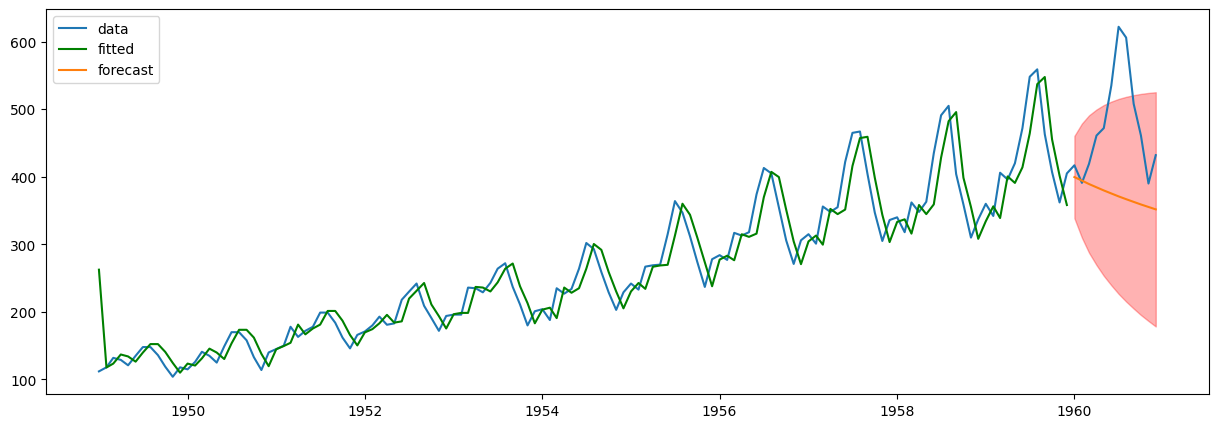

In [ ]:
plot_fit_and_forecast(arima_result)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


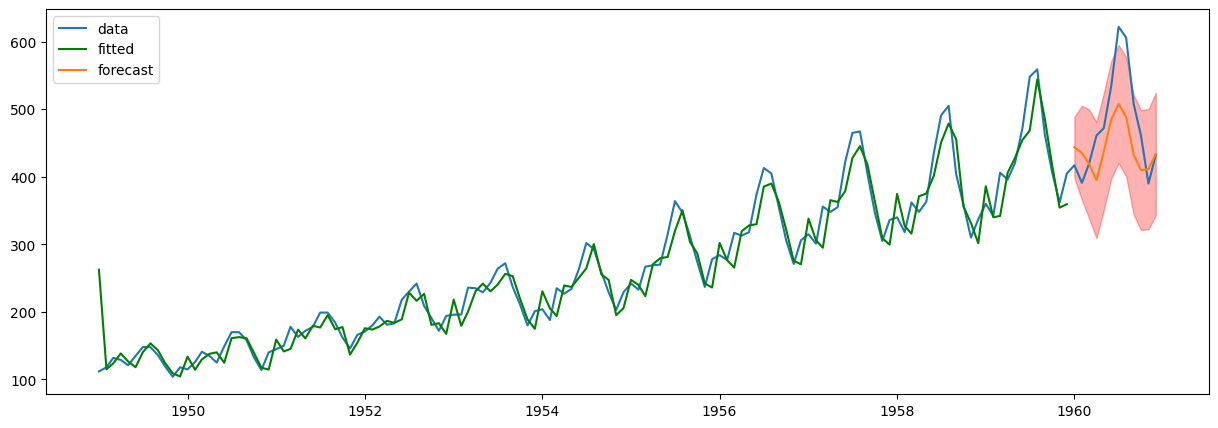

In [ ]:
arima = ARIMA(train['Passengers'],order=(10,0,0))
arima_result = arima.fit()
plot_fit_and_forecast(arima_result)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


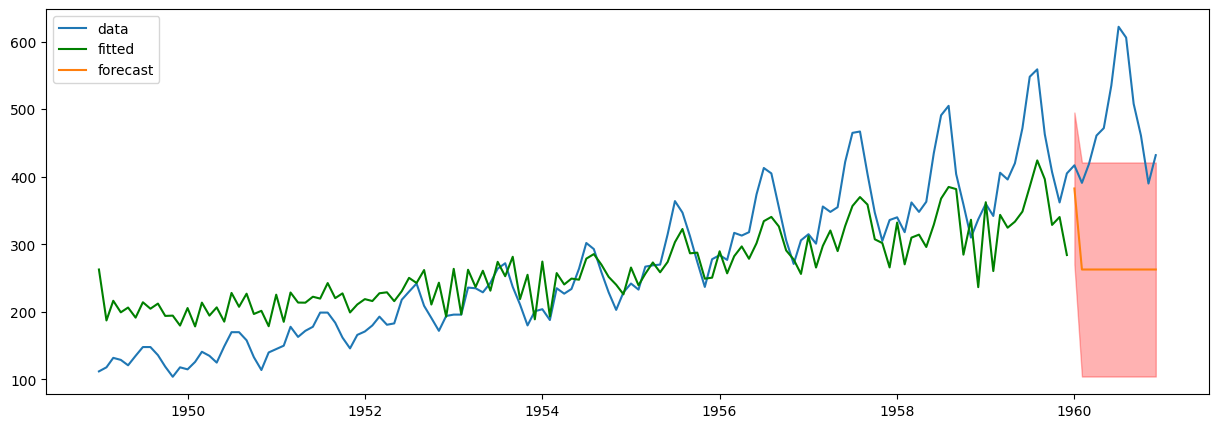

In [ ]:
arima = ARIMA(train['Passengers'], order=(0,0,1)) # MA(1)
arima_result = arima.fit()
plot_fit_and_forecast(arima_result)

In [ ]:
df['Log1stDiff'] = df['LogPassengers'].diff()

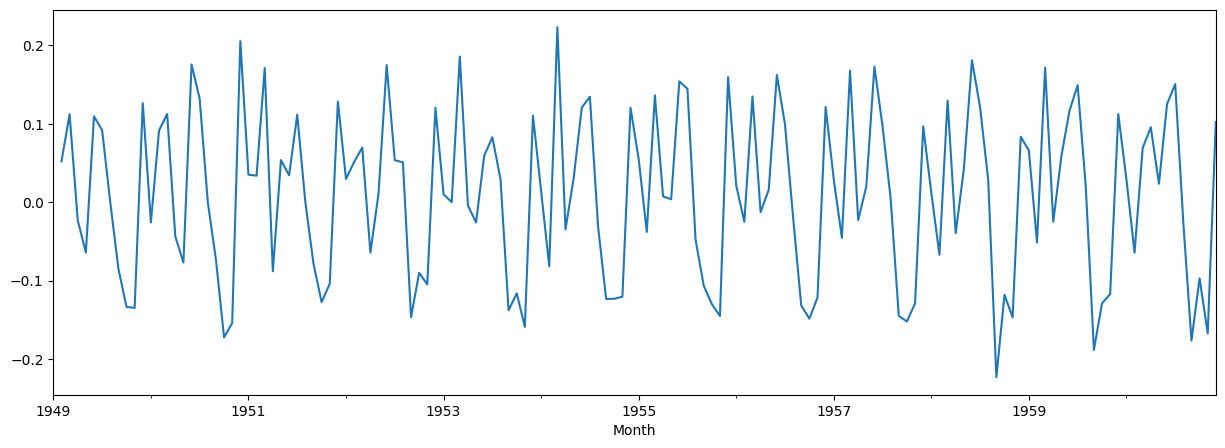

In [ ]:
df['Log1stDiff'].plot(figsize=(15, 5));

first data: 1949-01-01 00:00:00
first train pred: DatetimeIndex(['1949-02-01', '1949-03-01'], dtype='datetime64[ns]', name='Month', freq='MS')


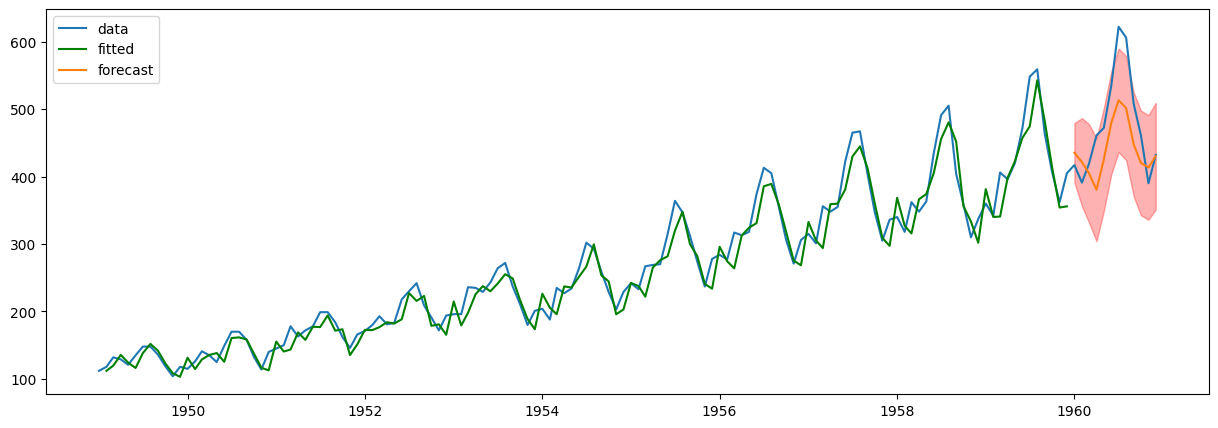

In [ ]:
arima = ARIMA(train['Passengers'], order=(8,1,1)) # p=8, d=1, q=1
arima_result_811 = arima.fit()
# We need to create a new function here since we have differenced the data, which removes a row
def plot_fit_and_forecast_int(result, d, col='Passengers'):
  fig, ax = plt.subplots(figsize=(15, 5))
  ax.plot(df[col], label='data')
  print("first data:", df.index[0])

  # plot the curve fitted on train set
  train_pred = result.predict(start=train.index[d], end=train.index[-1])
  print("first train pred:", train_pred.index[0:2])

  ax.plot(train.index[d:], train_pred, color='green', label='fitted')

  # forecast the test set
  prediction_result = result.get_forecast(Ntest)
  conf_int = prediction_result.conf_int()
  lower, upper = conf_int[f'lower {col}'], conf_int[f'upper {col}']
  forecast = prediction_result.predicted_mean
  ax.plot(test.index, forecast, label='forecast')
  ax.fill_between(test.index, \
                  lower, upper, \
                  color='red', alpha=0.3)
  ax.legend()

plot_fit_and_forecast_int(arima_result_811, 1)

first data: 1949-01-01 00:00:00
first train pred: DatetimeIndex(['1949-02-01', '1949-03-01'], dtype='datetime64[ns]', name='Month', freq='MS')


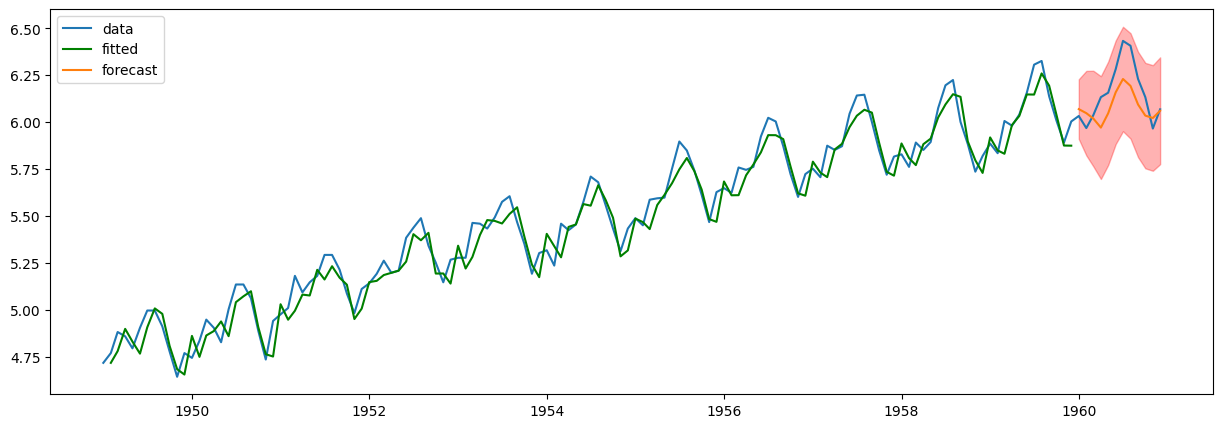

In [ ]:
arima = ARIMA(train['LogPassengers'], order=(8,1,1))
arima_result_log811 = arima.fit()
plot_fit_and_forecast_int(arima_result_log811, 1, col='LogPassengers')

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


first data: 1949-01-01 00:00:00
first train pred: DatetimeIndex(['1949-02-01', '1949-03-01'], dtype='datetime64[ns]', name='Month', freq='MS')


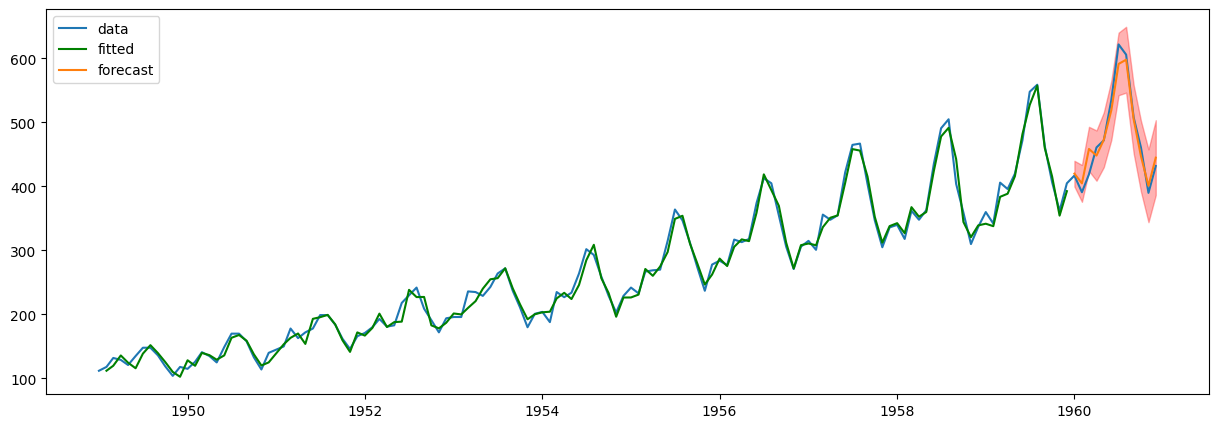

In [ ]:
arima = ARIMA(train['Passengers'], order=(12,1,0))
arima_result_1210 = arima.fit()
plot_fit_and_forecast_int(arima_result_1210, 1, col='Passengers')

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


first data: 1949-01-01 00:00:00
first train pred: DatetimeIndex(['1949-02-01', '1949-03-01'], dtype='datetime64[ns]', name='Month', freq='MS')


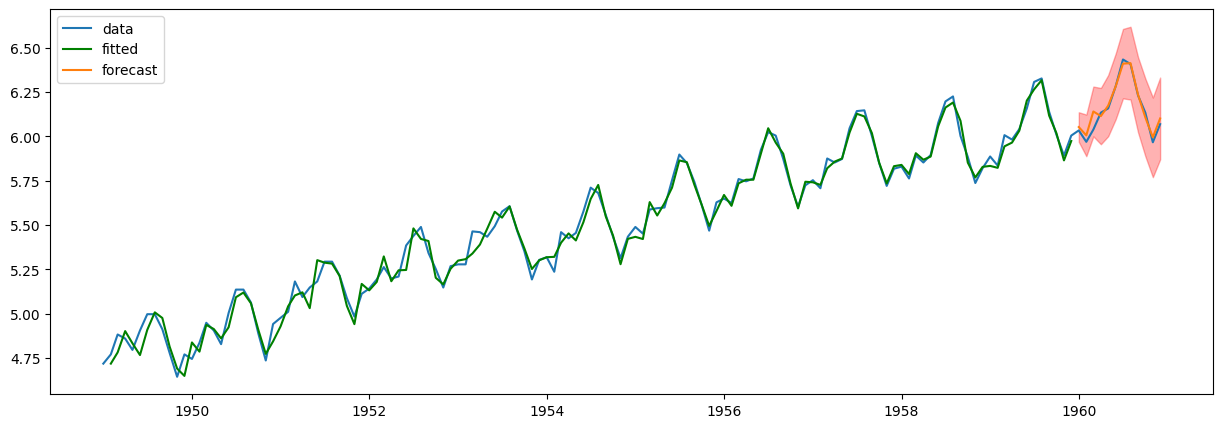

In [ ]:
arima = ARIMA(train['LogPassengers'], order=(12,1,0))
arima_result_log1210 = arima.fit()
plot_fit_and_forecast_int(arima_result_log1210, 1, col='LogPassengers')

In [ ]:
def rmse(result, is_logged):
  forecast = result.forecast(Ntest)
  if is_logged:
    forecast = np.exp(forecast)

  t = test['Passengers']
  y = forecast
  return np.sqrt(np.mean((t-y)**2))

In [ ]:
print("ARIMA(8,1,1):", rmse(arima_result_811, False))
print("ARIMA(8,1,1) logged:", rmse(arima_result_log811, True))
print("ARIMA(12,1,0):", rmse(arima_result_1210, False))
print("ARIMA(12,1,0) logged:", rmse(arima_result_log1210, True))

ARIMA(8,1,1): 59.06458996764054
ARIMA(8,1,1) logged: 61.60694094843056
ARIMA(12,1,0): 17.492713114526254
ARIMA(12,1,0) logged: 16.130971144527244


![](https://deeplearningcourses.com/notebooks_v3_pxl?sc=cWFkIiKGhgFV5RKGjNDXsg&n=ARIMA)